In [2]:
import os
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import gala.potential as gp
import numpy as np
import gala.dynamics as gd
from tqdm import trange
from gala.units import galactic, solarsystem, dimensionless
from HeaderP import *
from astropy.io import fits

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

In [6]:
# gaia data from https://gaia-kepler.fun/
with fits.open('marchetti.fits') as data_ga:
    gaia = pd.DataFrame(data_ga[1].data, dtype="float64")
#print(gaia)

In [8]:
list(gaia.columns)


['source_id',
 'ra',
 'dec',
 'parallax',
 'e_parallax',
 'pmra',
 'e_pmra',
 'pmdec',
 'e_pmdec',
 'vrad',
 'e_vrad',
 'GMag',
 'dist',
 'el_dist',
 'eu_dist',
 'rGC',
 'el_rGC',
 'eu_rGC',
 'RGC',
 'el_RGC',
 'eu_RGC',
 'xGC',
 'el_xGC',
 'eu_xGC',
 'yGC',
 'el_yGC',
 'eu_yGC',
 'zGC',
 'el_zGC',
 'eu_zGC',
 'U',
 'el_U',
 'eu_U',
 'V',
 'el_V',
 'eu_V',
 'W',
 'el_W',
 'eu_W',
 'UW',
 'el_UW',
 'eu_UW',
 'vR',
 'el_vR',
 'eu_vR',
 'vtot',
 'el_vtot',
 'eu_vtot',
 'P_ub']

# 1

In [144]:
snap300=np.load('Snap300.npy')
x,y,z=snap300[:,0],snap300[:,1],snap300[:,2]
vx,vy,vz=snap300[:,3],snap300[:,4],snap300[:,5]

R=np.sqrt(x**2+y**2+z**2)
phi=np.arctan(y/x)
vR=vx*np.cos(phi)+vy*np.sin(phi)
vphi=-vx*np.sin(phi)+vy*np.cos(phi)

In [145]:
sun_x=-8.2
sun_y=0.
sum_z=0.025

sun_u=14
sun_v=12.24
sun_w=7.25



In [146]:
m=np.sqrt((x-sun_x)**2+(y-sun_y)**2+(z-sum_z)**2)<1

In [147]:
vx_sun,vy_sun,vz_sun=vx[m],vy[m],vz[m]

1(a)

Text(0, 0.5, '$v_y$')

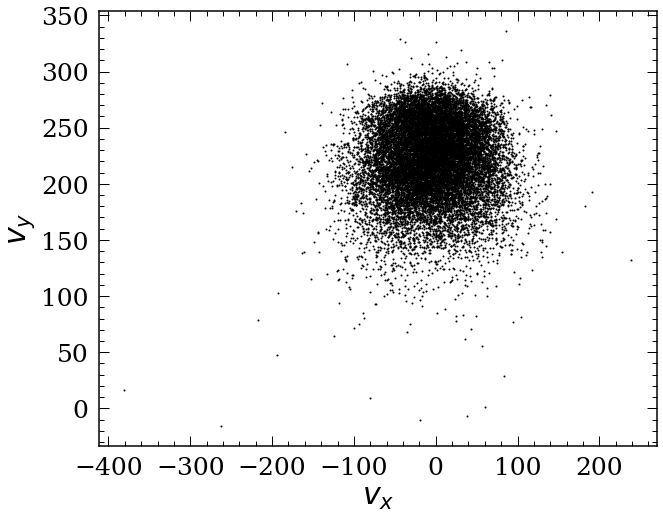

In [148]:
plt.figure(figsize=(10,8))
plt.scatter(vx_sun,vy_sun,s=1,c='k')
plt.xlabel('$v_x$')
plt.ylabel('$v_y$')

1(b)

Text(0, 0.5, '$z$')

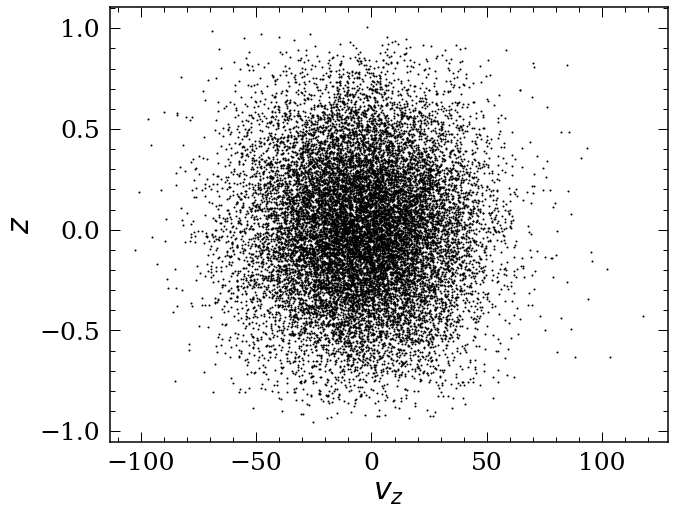

In [149]:
z_sun=z[m]

plt.figure(figsize=(10,8))
plt.scatter(vz_sun,z_sun,s=1,c='k')
plt.xlabel('$v_z$')
plt.ylabel('$z$')

In [150]:
x1,x2,y1,y2 = -60,60,-1,1
lims = [x1,x2,y1,y2]
image=makeagemap_each(vz_sun,z_sun,vphi[m],lims, 200)

Text(0, 0.5, 'z [pc]')

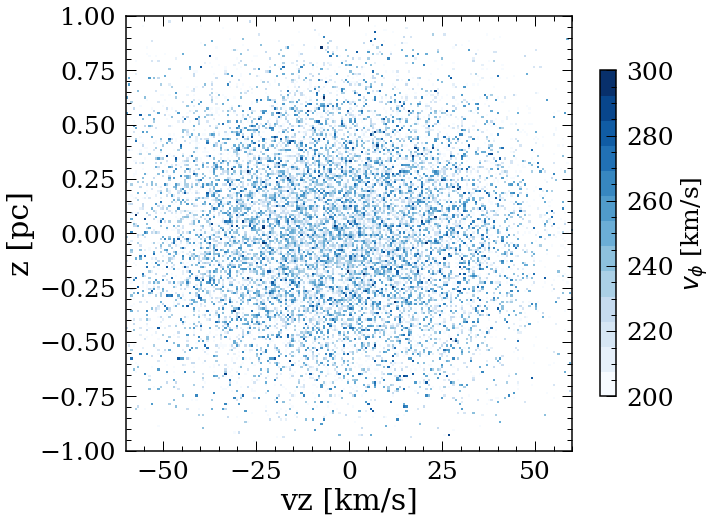

In [151]:
plt.figure(figsize=(10,8))
cmap1 = plt.cm.get_cmap('Blues',13)
cmap1.set_bad('white',1.)
plt.imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=200,vmax=300)
cb=plt.colorbar( shrink=.75)
cb.set_label('$v_{\phi}$ [km/s]',fontsize = 25,labelpad = 5)
plt.xlabel('vz [km/s]')
plt.ylabel('z [pc]')

# 3

In [157]:
x,y,z=gaia.xGC.values,gaia.yGC.values,gaia.zGC.values
u,v,w=gaia.U.values,gaia.V.values,gaia.W.values

In [158]:
m=np.sqrt((x-sun_x*1000)**2+(y-sun_y*1000)**2)<200

Text(0, 0.5, 'V [km/s]')

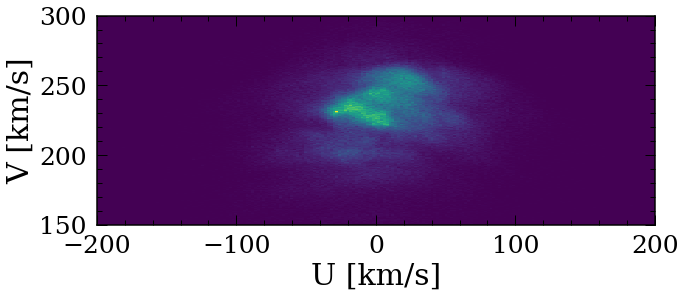

In [159]:
xedges = np.linspace(-200,200,200)
yedges = np.linspace(150,300,200)
plt.figure(figsize=(10,8))
H, xedges, yedges = np.histogram2d(u[m], v[m], bins=(xedges, yedges))
H = H.T
plt.imshow(H, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('U [km/s]')
plt.ylabel('V [km/s]')
#plt.scatter(u[m],v[m],c='k',s=1,alpha=0.3)

In [134]:
R=np.sqrt(x**2+y**2+z**2)
vphi=(x*v-y*u)/R

In [135]:
wp,zp,vphip=w[m],z[m],vphi[m]

In [154]:
x1,x2,y1,y2 = -60,60,-750,750
lims = [x1,x2,y1,y2]
image=makeagemap_each(wp,zp,vphip,lims, 200)

Text(0, 0.5, 'z [pc]')

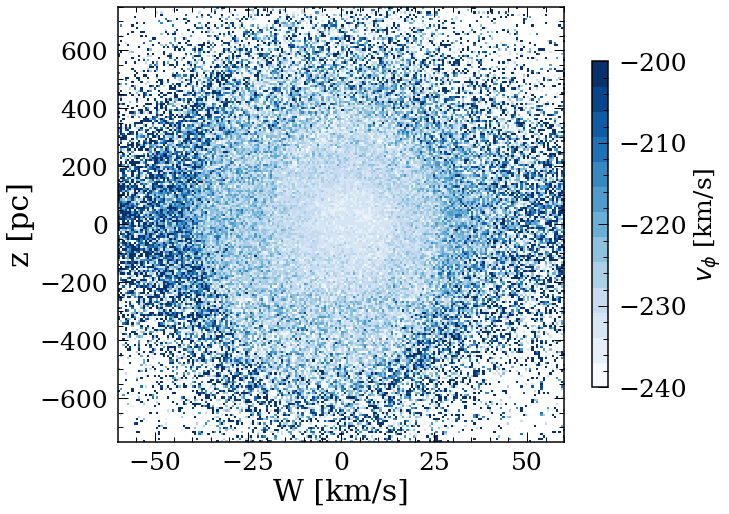

In [155]:
plt.figure(figsize=(10,8))
cmap1 = plt.cm.get_cmap('Blues',13)
cmap1.set_bad('white',1.)
plt.imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=-200,vmax=-240)
cb=plt.colorbar( shrink=.75)
cb.set_label('$v_{\phi}$ [km/s]',fontsize = 25,labelpad = 5)
plt.xlabel('W [km/s]')
plt.ylabel('z [pc]')

In [4]:
with fits.open('/Users/lucy/Downloads/kepler_dr2_4arcsec_wdm.fits') as data_ga:
    gaia = pd.DataFrame(data_ga[1].data, dtype="float64")

In [6]:
gaia['kepid']

0     5342558.0
1     7732146.0
2    11822514.0
3    12456401.0
4    11075611.0
Name: kepid, dtype: float64